# browserless 크롤링

- 앞선 selenium은 물리적으로 직접 브라우저를 켜 놓고 크롤링을 했습니다.
- 이렇게 크롤링을 하면 사람과 컴퓨터를 구분할 수 없기 때문에 크롤링을 막는 사이트를 뚫기 유용하ㅗ고
- 무엇보다 눈에 동작이 보여서 직관적이지만 실행속도가 느리다는 단점이 있습니다.

- selenium을 통한 크롤링 시에는 특히 비동기 요청이나 api크롤링을 하는데 어려움이 있기 때문에
- 이를 보안하기위해 requests를 사용합니다.

In [90]:
import requests # selenium과 달리 내장되어 있어서 따로 설치할 필요가 없음
from bs4 import BeautifulSoup # 웹에서 가져온 데이터를 정제하는 역할
import time # 코드중간에 딜레이를 넣는 역할
import codecs # 코덱스


'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
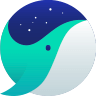
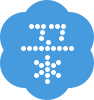

In [5]:
#1. request.get("접속주소")로 접속
res = requests.get("https://www.naver.com")
# 2.받아온 변수 res.text를하면 해당 페이지의 소스코드가 나옵니다
source = res.text
source


In [74]:

titleList = []
priceList = []
authorList = []
for i in range(10) :
    time.sleep(2)
    res = requests.get("https://www.kyobobook.co.kr/bestSellerNew/bestseller.laf?targetPage=%s" % i)
    source = res.text
    parsed_source = BeautifulSoup(source, "html.parser")

    ulTags = parsed_source.find_all("ul", class_="list_type01")
    title = ulTags[0].find_all("div", class_="title")
    price = ulTags[0].find_all("div", class_="price")
    author = ulTags[0].find_all("div", class_="author")
    # append 시 앞뒤에 "" 를 넣어주면 ,가 들어가도 문자취급을 하며 csv에 넣을수 있다
    for i in title :
        titleList.append(i.text.strip().replace(" ",""))
    for i in price :
        priceList.append(i.text.strip().replace("	","").replace("\r\n","").split(" ")[0].replace("도서","").replace("원","").replace("[10%↓","").replace(",","").replace("\n",""))
    for i in author : 
        authorList.append(i.text.replace("	","").replace("\r\n","").split("|")[0].split(" ")[0].replace("\n",""))

In [101]:

BookList = [["제목","가격","저자"]]
for i in range(0,len(titleList)) : 
    BookList.append([titleList[i],priceList[i],authorList[i]])
BookList

[['제목', '가격', '저자'],
 ['작별인사', '12600', '김영하'],
 ['불편한편의점(40만부기념벚꽃에디션)', '12600', '김호연'],
 ['흔한남매10', '12150', '흔한남매'],
 ['인플레이션에서살아남기', '16920', '오건영'],
 ['역행자', '15750', '자청'],
 ['기분을관리하면인생이관리된다', '15840', '김다슬'],
 ['마음의법칙', '14400', '폴커'],
 ['변화하는세계질서', '34200', '레이'],
 ['행성1(양장본HardCover)', '15120', '베르나르'],
 ['문재인의위로(양장본HardCover)', '14220', '더휴먼'],
 ['세상의마지막기차역', '12600', '무라세'],
 ['최재천의공부', '14850', '최재천저자'],
 ['GoGo카카오프렌즈24:스웨덴', '10800', '김미영'],
 ['무엇이옳은가', '16020', '후안'],
 ['멘탈을바꿔야인생이바뀐다', '14220', '박세니'],
 ['어느날,내죽음에네가들어왔다', '13500', '세이카'],
 ['이어령의마지막수업', '14850', '김지수저자'],
 ['내가틀릴수도있습니다', '14400', '비욘'],
 ['이웃집백만장자(골드리커버에디션)', '16920', '토머스'],
 ['어서오세요,휴남동서점입니다(여름숲에디션)', '13500', '황보름'],
 ['작별인사', '12600', '김영하'],
 ['불편한편의점(40만부기념벚꽃에디션)', '12600', '김호연'],
 ['흔한남매10', '12150', '흔한남매'],
 ['인플레이션에서살아남기', '16920', '오건영'],
 ['역행자', '15750', '자청'],
 ['기분을관리하면인생이관리된다', '15840', '김다슬'],
 ['마음의법칙', '14400', '폴커'],
 ['변화하는세계질서', '34200', '레이'],
 ['행성1(양장본HardCover)', '15120', '베르나르'

In [105]:
bookstr = "제목,가격,저자\n"
for i in range(0,len(titleList)) : 
    bookstr += titleList[i] + "," + priceList[i] + "," + authorList[i] + "\n"
f = codecs.open("C:/crawler1/1-10BestList.csv", encoding="utf-8", mode="w").write(bookstr)

200


In [112]:
bookStr = "제목,가격,저자\n"
for i in BookList :
    bookStr +=  ""+i+""
bookStr
#f = codecs.open("C:/crawler1/1-10BestList.csv", encoding="utf-8", mode="w").write(bookStr)

TypeError: can only concatenate str (not "list") to str